In [3]:
"""
Consolidates everything from all prior tutorials, except "euclidian stuff" (for that see 240410_kedar_euclidia...)
"""

'\nConsolidates everything from all prior tutorials, except "euclidian stuff" (for that see 240410_kedar_euclidia...)\n'

In [4]:
%load_ext autoreload
%autoreload 2

import pandas as pd
import matplotlib.pyplot as plt

The autoreload extension is already loaded. To reload it, use:
  %reload_ext autoreload


# Load DFallPa dataset

In [5]:
##### Method: loading functrion"

In [6]:
from neuralmonkey.classes.population_mult import load_handsaved_wrapper, dfpa_match_chans_across_pa_each_bregion
from neuralmonkey.classes.population_mult import extract_single_pa


In [7]:
# Method 1 - load a single DFallPA

# animal = "Pancho"
# date = 230126
# combine = False
# question = "CHAR_BASE_stroke"
# version = "stroke"

animal = "Diego"
date = 231120
combine = True
question = "CHAR_BASE_stroke"
version = "stroke"

# animal = "Pancho"
# date = 230126
# combine = True
# question = "CHAR_BASE_trial"
# version = "trial"

# animal = "Diego"
# date = 231205
# combine = True
# question = "CHAR_BASE_trial"
# version = "trial"

DFallpa = load_handsaved_wrapper(animal, date, version=version, combine_areas=combine, question=question)


Loading DFallpa from:  /lemur2/lucas/Dropbox/SCIENCE/FREIWALD_LAB/DATA/Xuan/DFallpa-Diego-231120-stroke-kilosort_if_exists-norm=None-combine=True-t1=-1.0-t2=1.8-quest=CHAR_BASE_stroke.pkl
TODO: Pancho -- combine circles with the tohers


In [8]:
from neuralmonkey.metadat.analy.anova_params import params_getter_euclidian_vars
from neuralmonkey.classes.population_mult import dfpa_concatbregion_preprocess_clean_bad_channels, dfpa_concatbregion_preprocess_wrapper

# LIST_VAR, LIST_VARS_OTHERS, LIST_CONTEXT, LIST_PRUNE_MIN_N_LEVS, LIST_FILTDICT = params_getter_euclidian_vars(question)

# Make a copy of all PA before normalization
plot_clean_lowfr_chans=False
dfpa_concatbregion_preprocess_wrapper(DFallpa, animal, date, plot_clean_lowfr_chans=plot_clean_lowfr_chans)


 == (1) Matching chans across events
M1  ...  23
M1  -- n chans final:  23
PMv  ...  63
PMv  -- n chans final:  63
PMd  ...  47
PMd  -- n chans final:  47
dlPFC  ...  16
dlPFC  -- n chans final:  16
vlPFC  ...  30
vlPFC  -- n chans final:  30
FP  ...  25
FP  -- n chans final:  25
SMA  ...  42
SMA  -- n chans final:  42
preSMA  ...  40
preSMA  -- n chans final:  40
 == (2) Remove bad chans based on drift
============== REMOVING DIRTY SITES:
... bregion  M1 ... event  00_stroke
chan 1002 Replacing these trials with mean good trial: [338, 339, 340, 341]
chan 1007 Replacing these trials with mean good trial: [172]
chan 1027 Replacing these trials with mean good trial: [337]
... bregion  PMv ... event  00_stroke
Removing these bad chans: [1055]
Chans exist in PA: [1032, 1033, 1034, 1035, 1036, 1037, 1038, 1039, 1040, 1043, 1044, 1045, 1046, 1047, 1048, 1049, 1050, 1051, 1052, 1053, 1054, 1055, 1056, 1057, 1058, 1059, 1060, 1061, 1062, 1063, 1064, 1065, 1066, 1067, 1068, 1069, 1070, 1071, 10

In [9]:
from neuralmonkey.classes.population_mult import dfallpa_preprocess_sort_by_trialcode

dfallpa_preprocess_sort_by_trialcode(DFallpa)


In [10]:
from neuralmonkey.scripts.analy_euclidian_chars_sp import behstrokes_preprocess_assign_col_bad_strokes, preprocess_pa
behstrokes_preprocess_assign_col_bad_strokes(DFallpa, animal, date)

In [11]:
PA = DFallpa["pa"].values[1]
dflab = PA.Xlabels["trials"]


In [ ]:
# OPTIONAL
import os
from neuralmonkey.scripts.analy_euclidian_chars_sp import preprocess_pa
from neuralmonkey.classes.population_mult import extract_single_pa

savedir = "/tmp/PREPROCESS"
os.makedirs(savedir, exist_ok=True)
PA = preprocess_pa(animal, date, PA, savedir, prune_version=None)


In [ ]:
dflab = PA.Xlabels["trials"]
dflab["supervision_stage_concise"].value_counts()

### Compare beh strokes

In [ ]:
PA.behavior_extract_strokes_to_dflab(trial_take_first_stroke=True)


In [ ]:
dflab = PA.Xlabels["trials"]

In [ ]:
from pythonlib.tools.pandastools import grouping_append_and_return_inner_items_good
shape_var = "shape_semantic_grp"
grpdict = grouping_append_and_return_inner_items_good(dflab, [shape_var, "task_kind"])

list_shape = dflab[shape_var].unique().tolist()

In [ ]:
# Given two set of strokes, score how similar they are.
tk1 = "prims_single"
tk2 = "character"
for shape in list_shape:
    key1 = (shape, tk1)
    key2 = (shape, tk2)
    if key1 not in grpdict.keys():
        print("Key not found: ", key1)
        continue
    if key2 not in grpdict.keys():
        print("Key not found: ", key2)
        continue
    
    strokes1 = dflab.iloc[grpdict[key1]]["strok_beh"].tolist()
    strokes2 = dflab.iloc[grpdict[key2]]["strok_beh"].tolist()



In [ ]:

from pythonlib.dataset.dataset_strokes import DatStrokes
ds = DatStrokes()
Cl = ds.distgood_compute_beh_beh_strok_distances(strokes1, strokes2, label_var=shape_var)



In [ ]:
from neuralmonkey.scripts.analy_euclidian_chars_sp import behstrokes_preprocess_assign_col_bad_strokes, preprocess_pa
behstrokes_preprocess_assign_col_bad_strokes(DFallpa, animal, date)

In [ ]:
pa = DFallpa["pa"].values[5]
preprocess_pa(animal, date, pa, "/tmp", None)

In [ ]:
behstrokes_extract_char_clust_sim(PA, animal, date, savedir=None, PLOT=False)

In [ ]:
PA = DFallpa["pa"].values[0]
behstrokes_extract_char_clust_sim(PA, animal, date, "/tmp", True)

# [0] Do state space and euclidian

##### First, prune PA to just good data

In [ ]:
from pythonlib.tools.pandastools import append_col_with_grp_index
import seaborn as sns
from pythonlib.tools.plottools import savefig

SAVEDIR_ANALYSIS = "/tmp/CHAR_SP_FINAL"
import os

In [ ]:
# Prune to just the DFallpa for testing.


In [ ]:
######### PARAMS
n_min_trials_per_shape = 5
LIST_NPCS_KEEP = [4,6,2]
PLOT_EACH_REGION = True

### State space plots
LIST_VAR = [
    "shape_semantic",
    "shape_semantic",
    "shape_semantic",
]
LIST_VARS_OTHERS = [
    ["task_kind", "stroke_index"],
    ["task_kind", "stroke_index"],
    ["task_kind", "stroke_index"],
]
LIST_CONTEXT = [
    {"same":["stroke_index"], "diff":["task_kind"]},
    {"same":["stroke_index"], "diff":["task_kind"]},
    {"same":["stroke_index"], "diff":["task_kind"]},
]
LIST_PRUNE_MIN_N_LEVS = [2 for _ in range(len(LIST_VAR))]
LIST_FILTDICT = [
    {"task_kind":["prims_single", "character"], "stroke_index":[0]},
    {"task_kind":["prims_single", "character"]},
    {"task_kind":["prims_single", "prims_on_grid"]},
    ]

for twind_analy in [(0.05, 0.25), (-0.05, 0.35), (0.1, 0.2)]:
    for subspace_projection in ["shape_prims_single", "pca"]:
        for prune_version in ["sp_char_0", "sp_char"]:
            for NPCS_KEEP in LIST_NPCS_KEEP:
                for raw_subtract_mean_each_timepoint in [False, True]:
                    SAVEDIR = f"{SAVEDIR_ANALYSIS}/subspc={subspace_projection}-prunedat={prune_version}-npcs={NPCS_KEEP}-subtr={raw_subtract_mean_each_timepoint}-twind={twind_analy}"
                    os.makedirs(SAVEDIR, exist_ok=True)

                    assert False
                    PLOT_STATE_SPACE = NPCS_KEEP == max(LIST_NPCS_KEEP)
                    run(animal, date, DFallpa, SAVEDIR, subspace_projection, prune_version, NPCS_KEEP, 
                            raw_subtract_mean_each_timepoint, n_min_trials_per_shape,
                            PLOT_EACH_REGION, PLOT_STATE_SPACE,
                            LIST_VAR, LIST_VARS_OTHERS, LIST_FILTDICT, LIST_PRUNE_MIN_N_LEVS, twind_analy)


##### Run, a single time

In [ ]:
from neuralmonkey.scripts.analy_euclidian_chars_sp import run
import os


In [ ]:
# prune_version = "sp_char_0"
# # subspace_projection = "shape_prims_single"
# subspace_projection = None
# twind_analy = (-0.15, 0.2)
# tbin_dur = 0.1
# tbin_slide = 0.02

prune_version = "sp_char_0"
subspace_projection = "shape_prims_single"
# subspace_projection = None
twind_analy = (0.05, 0.25)
tbin_dur = 0.1
tbin_slide = 0.05

NPCS_KEEP = None
raw_subtract_mean_each_timepoint = False
n_min_trials_per_shape = 5
PLOT_EACH_REGION = False
PLOT_STATE_SPACE = False
LIST_VAR = ["shape_semantic"]
LIST_VARS_OTHERS = [
    ["task_kind", "stroke_index"],
]
LIST_CONTEXT = [
    {"same":["stroke_index"], "diff":["task_kind"]},
]
LIST_PRUNE_MIN_N_LEVS = [2 for _ in range(len(LIST_VAR))]
LIST_FILTDICT = [
    {"task_kind":["prims_single", "character"], "stroke_index":[0]},
    ]

SAVEDIR = f"/tmp/TEST-{twind_analy}"
os.makedirs(SAVEDIR, exist_ok=True)

run(animal, date, DFallpa, SAVEDIR, subspace_projection, prune_version, NPCS_KEEP, 
        raw_subtract_mean_each_timepoint, n_min_trials_per_shape,
        PLOT_EACH_REGION, PLOT_STATE_SPACE,
        LIST_VAR, LIST_VARS_OTHERS, LIST_FILTDICT, LIST_PRUNE_MIN_N_LEVS, twind_analy,
        tbin_dur = tbin_dur, tbin_slide = tbin_slide)


In [ ]:
# Get time-series of eucl distance




##### Run, for a single bregion

In [ ]:
from neuralmonkey.classes.population_mult import extract_single_pa
from neuralmonkey.scripts.analy_euclidian_chars_sp import preprocess_pa
import os

In [ ]:
SAVEDIR = f"/tmp/TEST/{animal}-{date}"
os.makedirs(SAVEDIR, exist_ok=True)

In [ ]:
bregion = "preSMA_a"    
prune_version = "sp_char_0"
subspace_projection = "shape_prims_single"
# subspace_projection = None
raw_subtract_mean_each_timepoint = False
remove_drift = False

In [ ]:
twind_analy = (-0.15, 0.2)
tbin_dur = 0.1
tbin_slide = 0.02


In [ ]:
n_min_trials_per_shape = 5

# Run
PA = extract_single_pa(DFallpa, bregion, which_level="stroke", event="00_stroke")

savedir = f"{SAVEDIR}/preprocess"
os.makedirs(savedir, exist_ok=True)
plot_drawings = False
PA = preprocess_pa(animal, date, PA, savedir, prune_version, 
                    n_min_trials_per_shape=n_min_trials_per_shape, plot_drawings=plot_drawings,
                    remove_chans_fr_drift=remove_drift,
                    subspace_projection=subspace_projection, 
                           twind_analy=twind_analy, tbin_dur=tbin_dur, tbin_slide=tbin_slide, NPCS_KEEP=NPCS_KEEP)



In [ ]:
# Optionally, keep specific chans
# chans_keep = [1053, 1054]
chans_keep = [1044, 1049,  1053, 1054, 1057, 1059, 1062]
PA = PA.slice_by_dim_values_wrapper("chans", chans_keep)


In [ ]:
if True:
    pa = PA.slice_by_dim_values_wrapper("times", twind_analy)
    pa = pa.agg_by_time_windows_binned(tbin_dur, tbin_slide)

else:
    subspace_projection = "shape_prims_single"

    if subspace_projection == "pca":
        dim_red_method = "pca"
        superv_dpca_params={
            "superv_dpca_var":None,
            "superv_dpca_vars_group":None,
            "superv_dpca_filtdict":None,
        }
    elif subspace_projection == "shape_prims_single":
        dim_red_method = "superv_dpca"
        superv_dpca_params={
            "superv_dpca_var":"shape_semantic",
            "superv_dpca_vars_group":None,
            "superv_dpca_filtdict":{"task_kind":["prims_single"]}
        }
    elif subspace_projection == "shape_PIG_stroke0":
        # PIG (0)  
        dim_red_method = "superv_dpca"
        superv_dpca_params={
            "superv_dpca_var":"shape_semantic",
            "superv_dpca_vars_group":None,
            "superv_dpca_filtdict":{"task_kind":["prims_on_grid"], "stroke_index":[0]}
        }
    elif subspace_projection == "shape_char_stroke0":
        # Char  
        dim_red_method = "superv_dpca"
        superv_dpca_params={
            "superv_dpca_var":"shape_semantic",
            "superv_dpca_vars_group":None,
            "superv_dpca_filtdict":{"task_kind":["character"], "stroke_index":[0]}
        }
    else:
        print(subspace_projection)
        assert False
        

    ### New, cleaner method, taking all pairwise distances between trials
    savedir = f"{SAVEDIR}/each_region/{bregion}"
    os.makedirs(savedir, exist_ok=True)

    # (1) First, dim reduction
    superv_dpca_var = superv_dpca_params['superv_dpca_var']
    superv_dpca_vars_group = superv_dpca_params['superv_dpca_vars_group']
    superv_dpca_filtdict = superv_dpca_params['superv_dpca_filtdict']


    dim_red_method = "pca"
    twind_analy = (-0.15, 0.3)
    tbin_dur = 0.1
    tbin_slice = 0.01
    NPCS_KEEP = 10
    _, PAredu = PA.dataextract_dimred_wrapper("traj", dim_red_method, savedir, 
                                    twind_analy, tbin_dur=tbin_dur, tbin_slide=tbin_slice, 
                                    NPCS_KEEP = NPCS_KEEP,
                                    dpca_var = None, dpca_vars_group = None, dpca_filtdict=None, 
                                    dpca_proj_twind = twind_analy, 
                                    raw_subtract_mean_each_timepoint=raw_subtract_mean_each_timepoint,
                                    umap_n_components=None, umap_n_neighbors=None)
    

    pa = PAredu


# [2] Quick analyses of euclidian distances

In [ ]:
vars_group = ["task_kind", "shape_semantic"]
version = "traj"
DFDIST = pa.dataextractwrap_distance_between_groups(vars_group, version)
DFDIST

In [ ]:
from pythonlib.tools.pandastools import append_col_with_grp_index
# DFDIST = append_col_with_grp_index(DFDIST, ["shape_semantic_1", "shape_semantic_2"], "shape_semantic_same")
# DFDIST = append_col_with_grp_index(DFDIST, ["task_kind_1", "task_kind_2"], "task_kind_same")

DFDIST["task_kind_same"] = DFDIST["task_kind_1"] == DFDIST["task_kind_2"]
DFDIST["shape_semantic_same"] = DFDIST["shape_semantic_1"] == DFDIST["shape_semantic_2"]

DFDIST = append_col_with_grp_index(DFDIST, ["task_kind_1", "task_kind_2"], "task_kind_12")


DFDIST = append_col_with_grp_index(DFDIST, ["task_kind_same", "shape_semantic_same"], "same-task|shape")

DFDIST = append_col_with_grp_index(DFDIST, ["shape_semantic_same", "task_kind_12"], "same_shape|task_kind_12")


In [ ]:
import seaborn as sns
for y in ["dist_mean", "dist_norm", "dist_yue_diff"]:
    # sns.relplot(data=DFDIST, x="time_bin", y=y, hue="same_shape|task_kind_12", kind="line", errorbar=("ci", 68))
    sns.relplot(data=DFDIST, x="time_bin", y=y, hue="same-task|shape", kind="line", errorbar=("ci", 68))
    # fig = sns.relplot(data=DFDIST, x="time_bin", y=y, kind="line", hue="shape_novel_12")
    # fig = sns.relplot(data=DFDIST, x="time_bin", y=y, kind="line", hue="seqc_0_shape_12", col="shape_novel_12", legend=False, alpha=0.1)


In [ ]:
import seaborn as sns
sns.catplot(data=dfres, x = "bregion", hue="shape_task_same", y="dist_yue_diff", kind="bar", aspect=2)


In [ ]:
# Function...
from neuralmonkey.scripts.analy_euclidian_chars_sp import euclidian_time_resolved


SAVEDIR = "/tmp/TEST_TIME_RESOLV"
os.makedirs(SAVEDIR, exist_ok=True)

bregion = "preSMA_a"    
prune_version = "sp_char_0"
subspace_projection = None
# subspace_projection = "shape_prims_single"
NPCS_KEEP = 10
raw_subtract_mean_each_timepoint = False
remove_drift = False
twind_analy = (-0.15, 0.2)
tbin_dur = 0.1
tbin_slide = 0.02


euclidian_time_resolved(animal, date, DFallpa, bregion, prune_version, remove_drift, savedir, twind_analy,
                            tbin_dur, tbin_slide, 
                            subspace_projection, NPCS_KEEP, 
                            n_min_trials_per_shape = 5, raw_subtract_mean_each_timepoint=raw_subtract_mean_each_timepoint)


In [ ]:
if True:
    # testing by hand
    # remove = [1047, 1048, 1051, 1052, 1056, 1058]
    # remove = [1048, 1051, 1052, 1056, 1058, 1059, 1062]
    remove = [1052, 1056, 1057, 1062, 1073, 1075]
    PA = DFallpa["pa"].values[2]
    hack_prune_to_these_chans = [c for c in PA.Chans if c not in remove]
else:
    hack_prune_to_these_chans = None

# hack_prune_to_these_chans = [1049, 1053, 1054, 1057]
# hack_prune_to_these_chans = [1043, 1044, 1047, 1053, 1054, 1057]


In [ ]:
from neuralmonkey.scripts.analy_euclidian_chars_sp import euclidian_time_resolved
import os
# prune_version = "sp_char_0"
# prune_version = None
n_min_trials_per_shape = 5
raw_subtract_mean_each_timepoint = False


SAVEDIR_ANALYSIS = "/tmp/TEST_TIME_RESOLV"
os.makedirs(SAVEDIR_ANALYSIS, exist_ok=True)

NPCS_KEEP = 10
raw_subtract_mean_each_timepoint = False

twind_analy = (-0.35, 0.5)
tbin_dur = 0.1
tbin_slide = 0.02

# # for bregion in DFallpa["bregion"].unique().tolist():
# for bregion in ["PMv_m"]:
#     # for prune_version in ["sp_char_0", "pig_char_0"]:
#     for prune_version in ["sp_char", "pig_char", "sp_char_0"]:
#         # for subspace_projection in [None, "pca", "shape_prims_single", "shape_all"]:
#         for subspace_projection in [None]:
#             for remove_drift in [False]:
#                 for remove_singleprims_unstable in [True, False]:

#                     SAVEDIR = f"{SAVEDIR_ANALYSIS}/{bregion}-prune={prune_version}-ss={subspace_projection}-nodrift={remove_drift}-SpUnstable={remove_singleprims_unstable}-HACK-{hack_prune_to_these_chans is not None}"
#                     os.makedirs(SAVEDIR, exist_ok=True)
#                     print(SAVEDIR)


#                     euclidian_time_resolved(animal, date, DFallpa, bregion, prune_version, remove_drift, SAVEDIR, twind_analy,
#                                                 tbin_dur, tbin_slide, 
#                                                 subspace_projection, NPCS_KEEP, 
#                                                 n_min_trials_per_shape = 5, 
#                                                 raw_subtract_mean_each_timepoint=raw_subtract_mean_each_timepoint,
#                                                 hack_prune_to_these_chans=hack_prune_to_these_chans,
#                                                 remove_singleprims_unstable=remove_singleprims_unstable)

#                     assert False

# Compact version of above
from neuralmonkey.scripts.analy_euclidian_chars_sp import euclidian_time_resolved_wrapper
euclidian_time_resolved_wrapper(animal, date, DFallpa, "/tmp/TEST")

In [ ]:
n_min_trials_per_shape = 4
raw_subtract_mean_each_timepoint = False

NPCS_KEEP = 6

twind_analy = (-0.4, 0.5)
tbin_dur = 0.1
tbin_slide = 0.02

for bregion in DFallpa["bregion"].unique().tolist():
    for prune_version in ["sp_char_0", "pig_char_0", "sp_char", "pig_char_1plus"]:
        for subspace_projection in ["task_shape_si"]:
            for remove_drift in [False]:
                for raw_subtract_mean_each_timepoint in [False]:
                    for remove_singleprims_unstable in [True]:
                        SAVEDIR = f"{SAVEDIR_ANALYSIS}/{bregion}-prune={prune_version}-ss={subspace_projection}-nodrift={remove_drift}-SpUnstable={remove_singleprims_unstable}-subtrmean={raw_subtract_mean_each_timepoint}"
                        os.makedirs(SAVEDIR, exist_ok=True)
                        print("SAVING AT ... ", SAVEDIR)
                        euclidian_time_resolved(animal, date, DFallpa, bregion, prune_version, remove_drift, SAVEDIR, twind_analy,
                                                    tbin_dur, tbin_slide, 
                                                    subspace_projection, NPCS_KEEP, 
                                                    n_min_trials_per_shape = n_min_trials_per_shape, raw_subtract_mean_each_timepoint=raw_subtract_mean_each_timepoint,
                                                    remove_singleprims_unstable=remove_singleprims_unstable)


# [3] Samp, Go, reach onset

In [ ]:
import os
from neuralmonkey.scripts.analy_euclidian_chars_sp import euclidian_time_resolved

SAVEDIR_ANALYSIS = "/tmp/SAMP"
os.makedirs(SAVEDIR_ANALYSIS, exist_ok=True)


In [ ]:
DFallpa

In [ ]:
n_min_trials_per_shape = 4
raw_subtract_mean_each_timepoint = False
tbin_dur = 0.1
tbin_slide = 0.02
twind_analy = (-1, 1)
NPCS_KEEP = 7
events_keep = ["03_samp", "05_first_raise"]

HACK = True
for i, row in DFallpa.iterrows():
    bregion = row["bregion"]
    which_level = row["which_level"]
    event = row["event"]
    PA = row["pa"]

    if HACK and bregion not in ["PMv"]:
        continue

    if event in events_keep:
        for prune_version in ["sp_char"]:
            for subspace_projection in [None, "pca", "task_shape"]: # NOTE: shape_prims_single not great, you lose some part of preSMA context-dependence...
                for remove_drift in [False]:
                    for raw_subtract_mean_each_timepoint in [False]:
                        for remove_singleprims_unstable in [False, True]:
                            SAVEDIR = f"{SAVEDIR_ANALYSIS}/{which_level}-{bregion}-{event}-prune={prune_version}-ss={subspace_projection}-nodrift={remove_drift}-SpUnstable={remove_singleprims_unstable}-subtrmean={raw_subtract_mean_each_timepoint}"
                            os.makedirs(SAVEDIR, exist_ok=True)
                            print("SAVING AT ... ", SAVEDIR)
                            euclidian_time_resolved(animal, date, PA, which_level, prune_version, remove_drift, SAVEDIR, twind_analy,
                                                        tbin_dur, tbin_slide, 
                                                        subspace_projection, NPCS_KEEP, 
                                                        n_min_trials_per_shape = n_min_trials_per_shape, raw_subtract_mean_each_timepoint=raw_subtract_mean_each_timepoint,
                                                        remove_singleprims_unstable=remove_singleprims_unstable)


# Time warping based on behavior

In [ ]:
# For each trial, get beh stroke
date

# Checking drift of FR

In [ ]:
# Plot for each trial.
from neuralmonkey.scripts.analy_euclidian_chars_sp import plot_heatmap_firing_rates_all
plot_heatmap_firing_rates_all(PA, savedir)


### Sanity check, change over day?


In [ ]:
savedir = f"{SAVEDIR_ANALYSIS}/drift"
os.makedirs(savedir, exist_ok=True)

##### For each region, plot sm fr across trials and time

In [ ]:
# Loop over all bregions
assert False, "run for both chans and PCs"
for i, row in DFallpa.iterrows():
    PAthis = row["pa"]
    bregion = row["bregion"]

    dur = 0.1
    slide = 0.02
    PAthis = PAthis.agg_by_time_windows_binned(dur, slide)


    from neuralmonkey.neuralplots.population import heatmapwrapper_stratified_each_neuron
    fig = heatmapwrapper_stratified_each_neuron(PA, "task_kind")
    assert False
    assert False
    savefig(fig, f"{savedir}/{bregion}.png")
    plt.close("all")
    



In [ ]:
import os
SAVEDIR = f"/tmp/CHAR_HEATMAPS"
os.makedirs(SAVEDIR, exist_ok=True)

In [ ]:
# (1) First, dim reduction
superv_dpca_var = superv_dpca_params['superv_dpca_var']
superv_dpca_vars_group = superv_dpca_params['superv_dpca_vars_group']
superv_dpca_filtdict = superv_dpca_params['superv_dpca_filtdict']


dim_red_method = "pca"
twind_analy = (-0.15, 0.3)
tbin_dur = 0.1
tbin_slice = 0.01
NPCS_KEEP = 10
_, PAredu = PA.dataextract_dimred_wrapper("traj", dim_red_method, savedir, 
                                twind_analy, tbin_dur=tbin_dur, tbin_slide=tbin_slice, 
                                NPCS_KEEP = NPCS_KEEP,
                                dpca_var = None, dpca_vars_group = None, dpca_filtdict=None, 
                                dpca_proj_twind = twind_analy, 
                                raw_subtract_mean_each_timepoint=raw_subtract_mean_each_timepoint,
                                umap_n_components=None, umap_n_neighbors=None)


In [ ]:
PAredu.Times

In [ ]:
##### Script for heatmaps

In [ ]:
SAVEDIR

In [ ]:
date

In [ ]:
from neuralmonkey.scripts.analy_euclidian_chars_sp import params_subspace_projection
from neuralmonkey.scripts.analy_euclidian_chars_sp import plot_heatmap_firing_rates_all, plot_heatmap_firing_rates_all_wrapper

plot_heatmap_firing_rates_all_wrapper(DFallpa, SAVEDIR, animal, date)


# bregion = "FP_p"
# prune_version = "sp_char_0"
# n_min_trials_per_shape = 5
# raw_subtract_mean_each_timepoint = False
# ### FINAL -- script over all
# LIST_SS_PRUNE = [
#     (None, False),
#     ("pca", False),
#     ("shape_prims_single", False),
#     ("pca", True),
#     ("shape_prims_single", True),
# ]
# PA = extract_single_pa(DFallpa, bregion, which_level="stroke", event="00_stroke")

# ################# PREPROCESS
# savedir = f"{SAVEDIR}/preprocess"
# os.makedirs(savedir, exist_ok=True)
# plot_drawings = False
# PA = preprocess_pa(animal, date, PA, savedir, prune_version, 
#                 n_min_trials_per_shape=n_min_trials_per_shape, plot_drawings=plot_drawings)

# for subspace_projection, prune_chans in LIST_SS_PRUNE:

#     savedir = f"{SAVEDIR}/ss={subspace_projection}-prunedrift={prune_chans}"
#     os.makedirs(savedir, exist_ok=True)

#     ########### PRUNE CHANS
#     if prune_chans:
#         # Optioanlly, remove channels with drift
#         from neuralmonkey.classes.population_mult import dfallpa_preprocess_sitesdirty_single_just_drift
#         PA = dfallpa_preprocess_sitesdirty_single_just_drift(PA, animal, date)

#     ########### DIM REDUCTIONS
#     if subspace_projection is not None:
#         dim_red_method, superv_dpca_params = params_subspace_projection(subspace_projection)
#         superv_dpca_var = superv_dpca_params['superv_dpca_var']
#         superv_dpca_vars_group = superv_dpca_params['superv_dpca_vars_group']
#         superv_dpca_filtdict = superv_dpca_params['superv_dpca_filtdict']

#         twind_analy = (-0.2, 0.35)
#         tbin_dur = 0.1
#         tbin_slice = 0.01
#         NPCS_KEEP = 10
#         savedirthis = f"{savedir}/dimred-{subspace_projection}"
#         os.makedirs(savedirthis, exist_ok=True)
#         _, PAredu = PA.dataextract_dimred_wrapper("traj", dim_red_method, savedirthis, 
#                                         twind_analy, tbin_dur=tbin_dur, tbin_slide=tbin_slice, 
#                                         NPCS_KEEP = NPCS_KEEP,
#                                         dpca_var = superv_dpca_var, dpca_vars_group = superv_dpca_vars_group, dpca_filtdict=superv_dpca_filtdict, 
#                                         dpca_proj_twind = twind_analy, 
#                                         raw_subtract_mean_each_timepoint=raw_subtract_mean_each_timepoint,
#                                         umap_n_components=None, umap_n_neighbors=None)
#     else:
#         PAredu = PA

#     savedirthis = f"{savedir}/heatmaps-{subspace_projection}/{bregion}"
#     os.makedirs(savedirthis, exist_ok=True)
#     plot_heatmap_firing_rates_all(PAredu, savedirthis)

#     plt.close("all")


# # ################## [RAW]
# # savedir = f"{SAVEDIR}/heatmaps_raw/{bregion}"
# # os.makedirs(savedir, exist_ok=True)

# # plot_heatmap_firing_rates_all(PA, savedir)

# # ################# [PCA]
# # dim_red_method = "pca"
# # twind_analy = (-0.15, 0.3)
# # tbin_dur = 0.1
# # tbin_slice = 0.01
# # NPCS_KEEP = 10
# # superv_dpca_var = None
# # superv_dpca_vars_group = None
# # superv_dpca_filtdict = None
# # _, PAredu = PA.dataextract_dimred_wrapper("traj", dim_red_method, savedir, 
# #                                 twind_analy, tbin_dur=tbin_dur, tbin_slide=tbin_slice, 
# #                                 NPCS_KEEP = NPCS_KEEP,
# #                                 dpca_var = superv_dpca_var, dpca_vars_group = superv_dpca_vars_group, dpca_filtdict=superv_dpca_filtdict, 
# #                                 dpca_proj_twind = twind_analy, 
# #                                 raw_subtract_mean_each_timepoint=raw_subtract_mean_each_timepoint,
# #                                 umap_n_components=None, umap_n_neighbors=None)

# # savedir = f"{SAVEDIR}/heatmaps_pca/{bregion}"
# # os.makedirs(savedir, exist_ok=True)
# # plot_heatmap_firing_rates_all(PAredu, savedir)


# # ################# [DPCA]
# # dim_red_method = "superv_dpca"
# # superv_dpca_params={
# #     "superv_dpca_var":"shape_semantic",
# #     "superv_dpca_vars_group":None,
# #     "superv_dpca_filtdict":{"task_kind":["prims_single"]}
# # }
# # superv_dpca_var = superv_dpca_params['superv_dpca_var']
# # superv_dpca_vars_group = superv_dpca_params['superv_dpca_vars_group']
# # superv_dpca_filtdict = superv_dpca_params['superv_dpca_filtdict']
# # NPCS_KEEP = 6
# # _, PAredu = PA.dataextract_dimred_wrapper("traj", dim_red_method, savedir, 
# #                                 twind_analy, tbin_dur=tbin_dur, tbin_slide=tbin_slice, 
# #                                 NPCS_KEEP = NPCS_KEEP,
# #                                 dpca_var = superv_dpca_var, dpca_vars_group = superv_dpca_vars_group, dpca_filtdict=superv_dpca_filtdict, 
# #                                 dpca_proj_twind = twind_analy, 
# #                                 raw_subtract_mean_each_timepoint=raw_subtract_mean_each_timepoint,
# #                                 umap_n_components=None, umap_n_neighbors=None)
# # savedir = f"{SAVEDIR}/heatmaps_dpca/{bregion}"
# # os.makedirs(savedir, exist_ok=True)
# # plot_heatmap_firing_rates_all(PAredu, savedir)



### Accounting for drift -- exclude cases with very different PSTH.

In [ ]:
PA = DFallpa["pa"].values[2]

In [ ]:
from neuralmonkey.scripts.analy_euclidian_chars_sp import preprocess_clean_stable_single_prims_frate
savedir = "/tmp/test"
os.makedirs(savedir, exist_ok=True)
preprocess_clean_stable_single_prims_frate(PA, savedir=savedir)

##### Re-apply filter based on dirty sites, being more strict about drift

In [ ]:
# For each grouping, get the meanPSTH, and c

# MULT DATA - euclidian_time_resolved

In [ ]:
import pandas as pd

In [ ]:
from neuralmonkey.classes.session import _REGIONS_IN_ORDER, _REGIONS_IN_ORDER_COMBINED

import pandas as pd



In [ ]:
from neuralmonkey.scripts.analy_euclidian_chars_sp_MULT import  load_all_dates
# Diego (trial, all)
LIST_ANIMAL_DATE_COMB = [
    ("Diego", 231122, True),
    ("Diego", 231128, True),
    ("Diego", 231129, True),
    ("Diego", 231201, True),
    ("Diego", 231204, True),
    ("Diego", 231205, True),
    ("Diego", 231211, True),
    ("Diego", 231213, True),
]
which_level = "trial"
savedir_method_old = False

DFDIST = load_all_dates(LIST_ANIMAL_DATE_COMB, which_level, savedir_method_old)

In [ ]:
DFDIST

In [ ]:
# NOTE: For plots, see analy_euclidian_chars_sp_MULT.py

In [ ]:
from neuralmonkey.scripts.analy_euclidian_chars_sp_MULT import  plot_scalar_all
from pythonlib.tools.pandastools import aggregGeneral
from pythonlib.tools.pandastools import grouping_append_and_return_inner_items_good
from pythonlib.tools.pandastools import plot_45scatter_means_flexible_grouping
from pythonlib.tools.plottools import savefig
import os
import matplotlib.pyplot as plt


In [ ]:
twind_scalar = [-0.3, 0.1]
DFDISTthis = DFDIST[(DFDIST["time_bin"]>=twind_scalar[0]) & (DFDIST["time_bin"]<=twind_scalar[1])].reset_index(drop=True)

# Agg, averaging over time
DFTHISscal = aggregGeneral(DFDISTthis, ["animal", "date", "combine_areas", "event", "bregion", "metaparams", "same-task|shape", "prune_version", "subspace_projection", "remove_drift", "raw_subtract_mean_each_timepoint", 
                                "remove_singleprims_unstable"], values=["dist_mean", "dist_norm", "dist_yue_diff"])



In [ ]:
map_event_to_twind = {
    "03_samp":[0.2, 1.0],
    "05_first_raise":[-0.5,  0],
}

list_df = []
for event, twind_scalar in map_event_to_twind.items():
    dfthis = DFDIST[DFDIST["event"] == event]
    dfthis_sub = dfthis[(dfthis["time_bin"]>=twind_scalar[0]-0.001) & (dfthis["time_bin"]<=twind_scalar[1]+0.001)].reset_index(drop=True)
    list_df.append(dfthis_sub)
DFDISTthis = pd.concat(list_df).reset_index(drop=True)

# Agg, averaging over time
DFTHISscal = aggregGeneral(DFDISTthis, ["animal", "date", "combine_areas", "event", "bregion", "metaparams", "same-task|shape", "prune_version", "subspace_projection", "remove_drift", "raw_subtract_mean_each_timepoint", 
                                "remove_singleprims_unstable"], values=["dist_mean", "dist_norm", "dist_yue_diff"])


In [ ]:
from pythonlib.tools.expttools import writeDictToTxt
writeDictToTxt(map_event_to_twind, f"{savedir}/twind_params.txt")


In [ ]:
# Final scalar plot
DFTHISscal

In [ ]:
savedir = "/tmp/SCALAR"
os.makedirs(savedir, exist_ok=True)
grpdict = grouping_append_and_return_inner_items_good(DFTHISscal, ["event", "subspace_projection", "remove_drift", "raw_subtract_mean_each_timepoint", 
                                                                "remove_singleprims_unstable"])
for (event, subspace_projection, remove_drift, raw_subtract_mean_each_timepoint, remove_singleprims_unstable), inds in grpdict.items():
    dfthis = DFTHISscal.iloc[inds].reset_index(drop=True)

    _, fig = plot_45scatter_means_flexible_grouping(dfthis, "same-task|shape", "0|1", "1|0", 
                                        "prune_version", "dist_yue_diff", "bregion", 
                                        True, shareaxes=True, SIZE=4);
    savefig(fig, f"{savedir}/EVENT={event}-ss={subspace_projection}-rmvdrift={remove_drift}-subtrmean={raw_subtract_mean_each_timepoint}-rmvunstable={remove_singleprims_unstable}.pdf")
    plt.close("all")


##### Convert to scalar

In [ ]:
twind_scalar = [-0.3, 0.1]
from neuralmonkey.scripts.analy_euclidian_chars_sp_MULT import plot_scalar_all
plot_scalar_all(DFDIST, "/tmp", twind_scalar)

### Combine all kinds of pairwise comparisons in the same plot

In [ ]:
from pythonlib.tools.plottools import savefig
savedir = "/tmp"

In [ ]:
from pythonlib.tools.pandastools import grouping_append_and_return_inner_items_good
grpdict = grouping_append_and_return_inner_items_good(DFTHISscal, ["subspace_projection", "remove_drift", "raw_subtract_mean_each_timepoint", 
                                                                   "remove_singleprims_unstable"])
for (subspace_projection, remove_drift, raw_subtract_mean_each_timepoint, remove_singleprims_unstable), inds in grpdict.items():
    dfthis = DFTHISscal.iloc[inds].reset_index(drop=True)

    from pythonlib.tools.pandastools import plot_45scatter_means_flexible_grouping
    _, fig = plot_45scatter_means_flexible_grouping(dfthis, "same-task|shape", "0|1", "1|0", 
                                        "metaparams", "dist_yue_diff", "bregion", 
                                        True, shareaxes=True, SIZE=4);    
    savefig(fig, f"{savedir}/ss={subspace_projection}-rmvdrift={remove_drift}-subtrmean={raw_subtract_mean_each_timepoint}-rmvunstable={remove_singleprims_unstable}")
    plt.close("all)")

# Example figures (for paper)

In [ ]:
from neuralmonkey.scripts.analy_euclidian_chars_sp import behstrokes_preprocess_assign_col_bad_strokes, preprocess_pa
import numpy as np

In [ ]:

behstrokes_preprocess_assign_col_bad_strokes(DFallpa, animal, date)


### [Code] plot_heatmap_firing_rates_all_wrapper

In [ ]:
bregion = "PMv"
PA = extract_single_pa(DFallpa, bregion, which_level="stroke", event="00_stroke")
print(PA.X.shape)

prune_version = "sp_char_0"
n_min_trials_per_shape = 4
shape_var = "shape_semantic_grp"
plot_drawings = False
# twind_analy = (-0.4, 0.5)
twind_analy = (-0.35, 0.3)
tbin_dur=0.1
tbin_slide=0.01

NPCS_KEEP = 10
subspace_projection = "pca"
# NPCS_KEEP = None
# subspace_projection = None
raw_subtract_mean_each_timepoint = False

savedir = "/tmp"
PA = preprocess_pa(animal, date, PA, savedir, prune_version, 
                    n_min_trials_per_shape=n_min_trials_per_shape, shape_var=shape_var, plot_drawings=plot_drawings,
                    remove_chans_fr_drift=False,
                    subspace_projection=subspace_projection, 
                        twind_analy=twind_analy, tbin_dur=tbin_dur, tbin_slide=tbin_slide, NPCS_KEEP=NPCS_KEEP,
                        raw_subtract_mean_each_timepoint=raw_subtract_mean_each_timepoint,
                        remove_singleprims_unstable=True)



In [ ]:
from neuralmonkey.scripts.analy_euclidian_chars_sp import plot_heatmap_firing_rates_all_wrapper
import os
SAVEDIR_ANALYSIS = "/tmp/HEATMAP_WRAPPER"
os.makedirs(SAVEDIR_ANALYSIS, exist_ok=True)
plot_heatmap_firing_rates_all_wrapper(DFallpa, SAVEDIR_ANALYSIS, animal, date, 
                                      DEBUG_skip_drawings=True, DEBUG_bregion="PMv",
                                      DEBUG_subspace_projection="pca_proj")

In [ ]:
from neuralmonkey.scripts.analy_euclidian_chars_sp import behstrokes_preprocess_assign_col_bad_strokes, preprocess_pa
behstrokes_preprocess_assign_col_bad_strokes(DFallpa, animal, date)

In [ ]:
from neuralmonkey.classes.session import load_session_helper, load_mult_session_helper
MS = load_mult_session_helper(date, animal)   



In [ ]:
from neuralmonkey.scripts.analy_euclidian_chars_sp import beh_plot_event_timing_stroke
savedir = "/tmp"
PA = DFallpa.iloc[0]["pa"]
beh_plot_event_timing_stroke(PA, animal, date, savedir, MS=MS)

# [GOOD] Euclidian distance, using new fast method


In [ ]:
import os

In [ ]:
SAVEDIR_ANALYSIS = f"/tmp/EUCL_FAST"
os.makedirs(SAVEDIR_ANALYSIS, exist_ok=True)

In [ ]:
DFallpa = DFallpa.loc[[1],:]

In [ ]:
from neuralmonkey.scripts.analy_euclidian_chars_sp import euclidian_time_resolved_fast_shuffled
euclidian_time_resolved_fast_shuffled(DFallpa, animal, date, SAVEDIR_ANALYSIS, DO_RSA_HEATMAPS=True)

### [MULT DAYS] for: euclidian_time_resolved_fast_shuffled


In [12]:
from neuralmonkey.scripts.analy_shape_invariance_all_plots_SP import euclidian_time_resolved_fast_shuffled_mult_scatter_plots

In [ ]:
analysis_kind = "char_sp"
DFDISTS_AGG = euclidian_time_resolved_fast_shuffled_mult_scatter_plots(analysis_kind, just_return_df=True)

In [ ]:
analysis_kind = "char_sp"
euclidian_time_resolved_fast_shuffled_mult_scatter_plots(analysis_kind)

##### Code here (devo)

In [16]:
import os
SAVEDIR_ANALYSIS = "/tmp/CHAR_SP"
os.makedirs(SAVEDIR_ANALYSIS, exist_ok=True)


In [58]:
# assert False, "save split, or else file gets to mult GB -- run seprately for each bregion."
var_effect="shape_semantic_grp"
var_conj = "task_kind"
vars_group = [var_effect, var_conj]
N_MIN_TRIALS_PER_SHAPE = 4
TWIND_ANALY = (-0.4, 0.5)
NPCS_KEEP = 6
DO_RSA_HEATMAPS = False

SUBSPACE_PROJ_FIT_TWIND = {
    "00_stroke":[(-0.5, -0.05), (0.05, 0.5), (-0.5, 0.5), (-0.4, 0.3)],
}

# LIST_SUBSPACE_PROJECTION = [None, "pca_proj", "task_shape_si", "shape_prims_single"]
LIST_SUBSPACE_PROJECTION = ["shape_prims_single"]
LIST_PRUNE_VERSION = ["sp_char"] # GOOD

N_SPLITS = 2

twind_analy = TWIND_ANALY
tbin_dur = 0.2
tbin_slide = 0.02

map_event_to_listtwind_scal = {
    # "00_stroke":[(-0.5, -0.05), (0.05, 0.5), (-0.3, 0.1)],
    # "00_stroke":[(-0.5, -0.05), (-0.3, 0.1), (-0.3, 0.2), (-0.4, 0.3), (-0.2, 0.3), (0.05, 0.5)],
    "00_stroke":[(0.05, 0.5)],
    }

list_dfdist =[]
for _, row in DFallpa.iterrows():
    bregion = row["bregion"]
    which_level = row["which_level"]
    event = row["event"]
    PA = row["pa"]

    for prune_version in LIST_PRUNE_VERSION:

        for subspace_projection in LIST_SUBSPACE_PROJECTION:
            # plot only cleaned up data.
            list_unstable_badstrokes = [(True, True, True)]
                
            # for remove_drift in [False]:
            for remove_drift, remove_singleprims_unstable, remove_trials_with_bad_strokes in list_unstable_badstrokes:

                ############################
                if subspace_projection in [None, "pca"]:
                    list_fit_twind = [twind_analy]
                else:
                    list_fit_twind = SUBSPACE_PROJ_FIT_TWIND[event]
                
                for subspace_projection_fitting_twind in list_fit_twind:
                    
                    # Final save dir
                    SAVEDIR = f"{SAVEDIR_ANALYSIS}/{which_level}-{bregion}-{event}--prune={prune_version}-ss={subspace_projection}-nodrift={remove_drift}-SpUnstable={remove_singleprims_unstable}-RmBadStrks={remove_trials_with_bad_strokes}-fit_twind={subspace_projection_fitting_twind}"
                    os.makedirs(SAVEDIR, exist_ok=True)
                    print("SAVING AT ... ", SAVEDIR)

                    if DO_RSA_HEATMAPS:
                        # Plot pairwise distances (rsa heatmaps).
                        # This is done separatee to below becuase it doesnt use the train-test splits.
                        # It shold but I would have to code way to merge multple Cl, which is doable.
                        from neuralmonkey.analyses.euclidian_distance import timevarying_compute_fast_to_scalar

                        # PAthis = preprocess_pa(PA, animal, date, var_other, None, remove_drift, 
                        #                        subspace_projection, subspace_projection_fitting_twind, 
                        #                        twind_analy, tbin_dur, tbin_slide, raw_subtract_mean_each_timepoint=False,
                        #                        skip_dim_reduction=False)
                        
                        PAthis = preprocess_pa(animal, date, PA, None, prune_version, 
                                            n_min_trials_per_shape=N_MIN_TRIALS_PER_SHAPE, shape_var=var_effect, plot_drawings=False,
                                            remove_chans_fr_drift=remove_drift, subspace_projection=subspace_projection, 
                                                twind_analy=twind_analy, tbin_dur=tbin_dur, tbin_slide=tbin_slide, NPCS_KEEP=NPCS_KEEP,
                                                raw_subtract_mean_each_timepoint=False, remove_singleprims_unstable=remove_singleprims_unstable,
                                                remove_trials_with_bad_strokes=remove_trials_with_bad_strokes, 
                                                subspace_projection_fitting_twind=subspace_projection_fitting_twind)
                        
                        list_twind_scalar = map_event_to_listtwind_scal[event]
                        for twind_scal in list_twind_scalar:
                            savedir = f"{SAVEDIR}/rsa_heatmap/twindscal={twind_scal}"
                            os.makedirs(savedir, exist_ok=True)

                            # Prune to scalar window
                            pa = PAthis.slice_by_dim_values_wrapper("times", twind_scal)

                            # Make rsa heatmaps.
                            timevarying_compute_fast_to_scalar(pa, vars_group, rsa_heatmap_savedir=savedir)

                    # Preprocess
                    savedir = f"{SAVEDIR}/preprocess"
                    os.makedirs(savedir, exist_ok=True)

                    skip_dim_reduction = True # will do so below... THis just do other preprocessing, and widowing
                    PAthis = preprocess_pa(animal, date, PA, savedir, prune_version, 
                                        n_min_trials_per_shape=N_MIN_TRIALS_PER_SHAPE, shape_var=var_effect, plot_drawings=False,
                                        remove_chans_fr_drift=remove_drift, subspace_projection=subspace_projection, 
                                            twind_analy=twind_analy, tbin_dur=tbin_dur, tbin_slide=tbin_slide, NPCS_KEEP=NPCS_KEEP,
                                            raw_subtract_mean_each_timepoint=False, remove_singleprims_unstable=remove_singleprims_unstable,
                                            remove_trials_with_bad_strokes=remove_trials_with_bad_strokes, 
                                            subspace_projection_fitting_twind=subspace_projection_fitting_twind,
                                            skip_dim_reduction=skip_dim_reduction)


                    ########### DO TRAIN-TEST SPLITS
                    folds_dflab = PAthis.split_balanced_stratified_kfold_subsample_level_of_var(vars_group, None, None, 
                                                                                                n_splits=N_SPLITS, 
                                                                                                do_balancing_of_train_inds=False)

                    for _i_dimredu, (train_inds, test_inds) in enumerate(folds_dflab):
                        # train_inds, more inds than than test_inds
                        train_inds = [int(i) for i in train_inds]
                        test_inds = [int(i) for i in test_inds]

                        ############# DO DIM REDUCTION
                        from neuralmonkey.scripts.analy_shape_invariance_all_plots_SP import _preprocess_pa_dim_reduction
                        PAthisRedu = _preprocess_pa_dim_reduction(PAthis, subspace_projection, subspace_projection_fitting_twind,
                                twind_analy, tbin_dur, tbin_slide, savedir=None, raw_subtract_mean_each_timepoint=False,
                                inds_pa_fit=test_inds, inds_pa_final=train_inds)

                        if PAthisRedu is None:
                            print("SKIPPING, since PAthisRedu is None: ", SAVEDIR)
                            assert False
                        else:
                            # Take different windows (for computing scalar score)
                            # Go thru diff averaging windows (to get scalar)
                            list_twind_scalar = map_event_to_listtwind_scal[event]
                            for twind_scal in list_twind_scalar:
                                
                                pa = PAthisRedu.slice_by_dim_values_wrapper("times", twind_scal)

                                # ###################################### Running euclidian
                                # from neuralmonkey.analyses.euclidian_distance import timevarying_compute_fast_to_scalar
                                
                                # # (1) Data
                                # dfdist, _ = timevarying_compute_fast_to_scalar(pa, label_vars=vars_group)
                                
                                # dfdist["bregion"] = bregion
                                # dfdist["prune_version"] = prune_version
                                # dfdist["which_level"] = which_level
                                # dfdist["event"] = event
                                # dfdist["subspace_projection"] = subspace_projection
                                # dfdist["subspace_projection_fitting_twind"] = [subspace_projection_fitting_twind for _ in range(len(dfdist))]
                                # dfdist["dim_redu_fold"] = _i_dimredu
                                # dfdist["twind_scal"] = [twind_scal for _ in range(len(dfdist))]
                                # list_dfdist.append(dfdist)


SAVING AT ...  /tmp/CHAR_SP/stroke-M1-00_stroke--prune=sp_char-ss=shape_prims_single-nodrift=True-SpUnstable=True-RmBadStrks=True-fit_twind=(-0.5, -0.05)
pa.slice_by_labels_filtdict, using var=task_kind, n before filt: (22, 822, 280)
pa.slice_by_labels_filtdict, using var=task_kind, n after filt: (22, 300, 280)
pa.slice_by_labels_filtdict, using var=index_datapt, n before filt: (22, 300, 280)
pa.slice_by_labels_filtdict, using var=index_datapt, n after filt: (22, 48, 280)
distmat_construct_wrapper:  0
distmat_construct_wrapper:  0
distmat_construct_wrapper:  0
distmat_construct_wrapper:  0
distmat_construct_wrapper:  0
distmat_construct_wrapper:  0
distmat_construct_wrapper:  0
distmat_construct_wrapper:  0
distmat_construct_wrapper:  0
distmat_construct_wrapper:  0
distmat_construct_wrapper:  0
distmat_construct_wrapper:  0
distmat_construct_wrapper:  0
distmat_construct_wrapper:  0
distmat_construct_wrapper:  0
distmat_construct_wrapper:  0
distmat_construct_wrapper:  0
distmat_const

/home/lucas/miniconda3/envs/drag2_matlab/lib/python3.8/site-packages/seaborn/axisgrid.py:118: UserWarning: The figure layout has changed to tight
  self._figure.tight_layout(*args, **kwargs)
/home/lucas/miniconda3/envs/drag2_matlab/lib/python3.8/site-packages/seaborn/axisgrid.py:118: UserWarning: The figure layout has changed to tight
  self._figure.tight_layout(*args, **kwargs)


Doing PCA
SAVING AT ...  /tmp/CHAR_SP/stroke-M1-00_stroke--prune=sp_char-ss=shape_prims_single-nodrift=True-SpUnstable=True-RmBadStrks=True-fit_twind=(0.05, 0.5)
pa.slice_by_labels_filtdict, using var=task_kind, n before filt: (22, 822, 280)
pa.slice_by_labels_filtdict, using var=task_kind, n after filt: (22, 300, 280)
pa.slice_by_labels_filtdict, using var=index_datapt, n before filt: (22, 300, 280)
pa.slice_by_labels_filtdict, using var=index_datapt, n after filt: (22, 48, 280)
distmat_construct_wrapper:  0
distmat_construct_wrapper:  0
distmat_construct_wrapper:  0
distmat_construct_wrapper:  0
distmat_construct_wrapper:  0
distmat_construct_wrapper:  0
distmat_construct_wrapper:  0
distmat_construct_wrapper:  0
distmat_construct_wrapper:  0
distmat_construct_wrapper:  0
distmat_construct_wrapper:  0
distmat_construct_wrapper:  0
distmat_construct_wrapper:  0
distmat_construct_wrapper:  0
distmat_construct_wrapper:  0
distmat_construct_wrapper:  0
distmat_construct_wrapper:  0
distm

/home/lucas/miniconda3/envs/drag2_matlab/lib/python3.8/site-packages/seaborn/axisgrid.py:118: UserWarning: The figure layout has changed to tight
  self._figure.tight_layout(*args, **kwargs)
/home/lucas/miniconda3/envs/drag2_matlab/lib/python3.8/site-packages/seaborn/axisgrid.py:118: UserWarning: The figure layout has changed to tight
  self._figure.tight_layout(*args, **kwargs)


pa.slice_by_labels_filtdict, using var=task_kind, n before filt: (22, 822, 280)
pa.slice_by_labels_filtdict, using var=task_kind, n after filt: (22, 300, 280)
pa.slice_by_labels_filtdict, using var=index_datapt, n before filt: (22, 300, 280)
pa.slice_by_labels_filtdict, using var=index_datapt, n after filt: (22, 48, 280)
distmat_construct_wrapper:  0
distmat_construct_wrapper:  0
distmat_construct_wrapper:  0
distmat_construct_wrapper:  0
distmat_construct_wrapper:  0
distmat_construct_wrapper:  0
distmat_construct_wrapper:  0
distmat_construct_wrapper:  0
distmat_construct_wrapper:  0
distmat_construct_wrapper:  0
distmat_construct_wrapper:  0
distmat_construct_wrapper:  0
distmat_construct_wrapper:  0
distmat_construct_wrapper:  0
distmat_construct_wrapper:  0
distmat_construct_wrapper:  0
distmat_construct_wrapper:  0
distmat_construct_wrapper:  0
distmat_construct_wrapper:  0
distmat_construct_wrapper:  0
distmat_construct_wrapper:  0
distmat_construct_wrapper:  0
distmat_construct

/home/lucas/miniconda3/envs/drag2_matlab/lib/python3.8/site-packages/seaborn/axisgrid.py:118: UserWarning: The figure layout has changed to tight
  self._figure.tight_layout(*args, **kwargs)
/home/lucas/miniconda3/envs/drag2_matlab/lib/python3.8/site-packages/seaborn/axisgrid.py:118: UserWarning: The figure layout has changed to tight
  self._figure.tight_layout(*args, **kwargs)


pa.slice_by_labels_filtdict, using var=task_kind, n before filt: (22, 822, 280)
pa.slice_by_labels_filtdict, using var=task_kind, n after filt: (22, 300, 280)
pa.slice_by_labels_filtdict, using var=index_datapt, n before filt: (22, 300, 280)
pa.slice_by_labels_filtdict, using var=index_datapt, n after filt: (22, 48, 280)
distmat_construct_wrapper:  0
distmat_construct_wrapper:  0
distmat_construct_wrapper:  0
distmat_construct_wrapper:  0
distmat_construct_wrapper:  0
distmat_construct_wrapper:  0
distmat_construct_wrapper:  0
distmat_construct_wrapper:  0
distmat_construct_wrapper:  0
distmat_construct_wrapper:  0
distmat_construct_wrapper:  0
distmat_construct_wrapper:  0
distmat_construct_wrapper:  0
distmat_construct_wrapper:  0
distmat_construct_wrapper:  0
distmat_construct_wrapper:  0
distmat_construct_wrapper:  0
distmat_construct_wrapper:  0
distmat_construct_wrapper:  0
distmat_construct_wrapper:  0
distmat_construct_wrapper:  0
distmat_construct_wrapper:  0
distmat_construct

/home/lucas/miniconda3/envs/drag2_matlab/lib/python3.8/site-packages/seaborn/axisgrid.py:118: UserWarning: The figure layout has changed to tight
  self._figure.tight_layout(*args, **kwargs)
/home/lucas/miniconda3/envs/drag2_matlab/lib/python3.8/site-packages/seaborn/axisgrid.py:118: UserWarning: The figure layout has changed to tight
  self._figure.tight_layout(*args, **kwargs)


pa.slice_by_labels_filtdict, using var=task_kind, n before filt: (61, 822, 280)
pa.slice_by_labels_filtdict, using var=task_kind, n after filt: (61, 300, 280)
pa.slice_by_labels_filtdict, using var=index_datapt, n before filt: (61, 300, 280)
pa.slice_by_labels_filtdict, using var=index_datapt, n after filt: (61, 48, 280)
distmat_construct_wrapper:  0
distmat_construct_wrapper:  0
distmat_construct_wrapper:  0
distmat_construct_wrapper:  0
distmat_construct_wrapper:  0
distmat_construct_wrapper:  0
distmat_construct_wrapper:  0
distmat_construct_wrapper:  0
distmat_construct_wrapper:  0
distmat_construct_wrapper:  0
distmat_construct_wrapper:  0
distmat_construct_wrapper:  0
distmat_construct_wrapper:  0
distmat_construct_wrapper:  0
distmat_construct_wrapper:  0
distmat_construct_wrapper:  0
distmat_construct_wrapper:  0
distmat_construct_wrapper:  0
distmat_construct_wrapper:  0
distmat_construct_wrapper:  0
distmat_construct_wrapper:  0
distmat_construct_wrapper:  0
distmat_construct

/home/lucas/miniconda3/envs/drag2_matlab/lib/python3.8/site-packages/seaborn/axisgrid.py:118: UserWarning: The figure layout has changed to tight
  self._figure.tight_layout(*args, **kwargs)
/home/lucas/miniconda3/envs/drag2_matlab/lib/python3.8/site-packages/seaborn/axisgrid.py:118: UserWarning: The figure layout has changed to tight
  self._figure.tight_layout(*args, **kwargs)


pa.slice_by_labels_filtdict, using var=task_kind, n before filt: (61, 822, 280)
pa.slice_by_labels_filtdict, using var=task_kind, n after filt: (61, 300, 280)
pa.slice_by_labels_filtdict, using var=index_datapt, n before filt: (61, 300, 280)
pa.slice_by_labels_filtdict, using var=index_datapt, n after filt: (61, 48, 280)
distmat_construct_wrapper:  0
distmat_construct_wrapper:  0
distmat_construct_wrapper:  0
distmat_construct_wrapper:  0
distmat_construct_wrapper:  0
distmat_construct_wrapper:  0
distmat_construct_wrapper:  0
distmat_construct_wrapper:  0
distmat_construct_wrapper:  0
distmat_construct_wrapper:  0
distmat_construct_wrapper:  0
distmat_construct_wrapper:  0
distmat_construct_wrapper:  0
distmat_construct_wrapper:  0
distmat_construct_wrapper:  0
distmat_construct_wrapper:  0
distmat_construct_wrapper:  0
distmat_construct_wrapper:  0
distmat_construct_wrapper:  0
distmat_construct_wrapper:  0
distmat_construct_wrapper:  0
distmat_construct_wrapper:  0
distmat_construct

/home/lucas/miniconda3/envs/drag2_matlab/lib/python3.8/site-packages/seaborn/axisgrid.py:118: UserWarning: The figure layout has changed to tight
  self._figure.tight_layout(*args, **kwargs)
/home/lucas/miniconda3/envs/drag2_matlab/lib/python3.8/site-packages/seaborn/axisgrid.py:118: UserWarning: The figure layout has changed to tight
  self._figure.tight_layout(*args, **kwargs)


KeyboardInterrupt: 

In [37]:
dflab = PAthis.Xlabels["trials"]

from pythonlib.tools.pandastools import grouping_plot_n_samples_conjunction_heatmap
grouping_plot_n_samples_conjunction_heatmap(dflab, "shape_semantic_grp", "task_kind", ["stroke_index"]);

In [31]:
savedir = "/tmp"

In [41]:
subspace_projection

'shape_prims_single'

In [42]:
subspace_projection_fitting_twindsubspace_projection_fitting_twind

(-0.5, -0.05)

***: superv_dpca  fit twind:  (-0.5, -0.05) , data twind:  (-0.4, 0.5)
pa.slice_by_labels_filtdict, using var=task_kind, n before filt: (22, 21, 280)
pa.slice_by_labels_filtdict, using var=task_kind, n after filt: (22, 8, 280)
plot_counts_heatmap_savepath None
2 asdasd


AssertionError: 

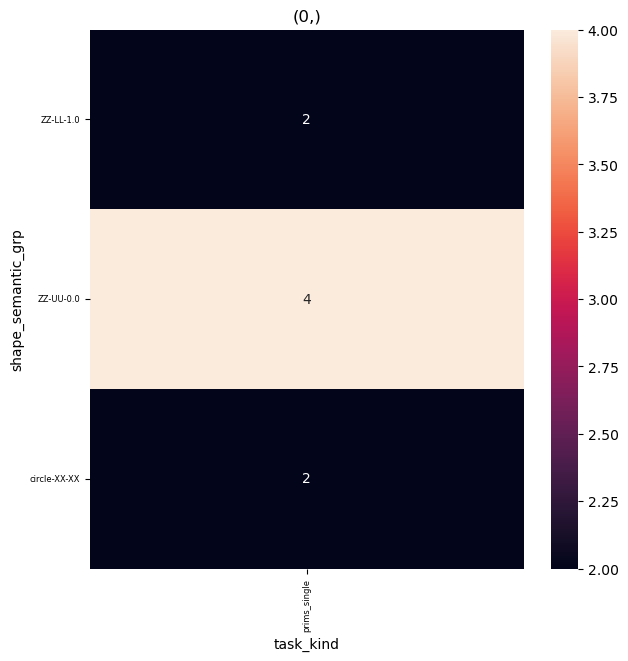

In [54]:
PAthisRedu = _preprocess_pa_dim_reduction(PAthis, subspace_projection, subspace_projection_fitting_twind,
        twind_analy, tbin_dur, tbin_slide, savedir=None, raw_subtract_mean_each_timepoint=False,
        inds_pa_fit=test_inds, inds_pa_final=train_inds)
print(PAthisRedu)

# [OLDER] Euclidian timecourse

In [ ]:
import os
SAVEDIR_ANALYSIS = f"/tmp/EUCL_TIMECOURSE"
os.makedirs(SAVEDIR_ANALYSIS, exist_ok=True)
from neuralmonkey.scripts.analy_euclidian_chars_sp import euclidian_time_resolved_wrapper
euclidian_time_resolved_wrapper(animal, date, DFallpa, SAVEDIR_ANALYSIS)

# Cross-temporal scoring

Consider each timebin for char vs. each timebin for SP.

For each, get scores of diff|same, etc.


In [ ]:

# - Reshape PA so that time is on the trial axis.
from neuralmonkey.classes.population import concatenate_popanals

list_pa = []
list_labels = []
for i in range(len(PAredu.Times)):
    pathis = PAredu.slice_by_dim_indices_wrapper("times", [i])

    # collect infoextract_snippets_trials
    list_pa.append(pathis)
    list_labels.append(i)

PAreduScal = concatenate_popanals(list_pa, dim="trials", 
                                map_idxpa_to_value=list_labels, 
                                map_idxpa_to_value_colname="time_bin",
                                assert_otherdims_have_same_values=False,
                                times_realign_so_first_index_is_this_time=0)
PAreduScal.Times

In [ ]:
Cldist = PAreduScal.dataextract_as_distance_matrix_clusters_flex(["task_kind", "shape_semantic", "time_bin"], 
                                                             return_as_single_mean_over_time=True)



In [ ]:
dfres = Cldist.rsa_distmat_score_all_pairs_of_label_groups(False)


In [ ]:
dfres["task_kind_same"] = dfres["task_kind_1"] == dfres["task_kind_2"]
dfres["shape_semantic_same"] = dfres["shape_semantic_1"] == dfres["shape_semantic_2"]
dfres = append_col_with_grp_index(dfres, ["shape_semantic_same", "task_kind_same"], "shape_task_same")
dfres = append_col_with_grp_index(dfres, ["task_kind_1", "task_kind_2"], "task_kind_pair")
dfres = append_col_with_grp_index(dfres, ["shape_semantic_1", "shape_semantic_2"], "shape_semantic_pair")
dfres = append_col_with_grp_index(dfres, ["time_bin_1", "time_bin_2"], "time_bin_pair")

dfres = append_col_with_grp_index(dfres, ["shape_semantic_same", "task_kind_1", "task_kind_2"], "ss_task_kind_pair")


In [ ]:
dfres

In [ ]:
plot_subplots_heatmap(dfres, "time_bin_1", "time_bin_2", "dist_yue_diff", "ss_task_kind_pair", share_zlim=True)
plot_subplots_heatmap(dfres, "time_bin_1", "time_bin_2", "dist_mean", "ss_task_kind_pair", share_zlim=True)


In [ ]:
# TODO: Take difference across subplots, plotting a new subplot.

# Check motor similarity of strokes from SP vs. CHAR

In [ ]:
from neuralmonkey.scripts.analy_euclidian_chars_sp import preprocess_pa
from neuralmonkey.classes.population_mult import extract_single_pa

savedir = "/tmp/PREPROCESS"
os.makedirs(savedir, exist_ok=True)
PA = preprocess_pa(PA, savedir)

# Collect and plot across days

In [ ]:
SAVEDIR_SAVE = f"/lemur2/lucas/analyses/recordings/main/euclidian_char_sp/MULT"

list_animal_date = [
    # ("Pancho", 230112),
    # ("Pancho", 230117),
    # ("Pancho", 230118),
    ("Pancho", 230119),
    ("Pancho", 230120),
    ("Pancho", 230122),
    ("Pancho", 230125),
    ("Pancho", 230126),
    ("Pancho", 230127),
    ]

combine = True
ANIMAL = "Pancho"

LIST_NPCS_KEEP = [4,6,2]
for twind_analy in [(0.05, 0.25), (-0.05, 0.35), (0.1, 0.2)]:
    for subspace_projection in ["shape_prims_single", "pca"]:
        for prune_version in ["sp_char_0", "sp_char"]:
            for NPCS_KEEP in LIST_NPCS_KEEP:
                for raw_subtract_mean_each_timepoint in [False, True]:

                    # subspace_projection = "shape_prims_single"
                    # prune_version = "sp_char_0"
                    # NPCS_KEEP = 4
                    # raw_subtract_mean_each_timepoint = False
                    # twind_analy = (0.05, 0.25)

                    try:
                        ### Load all data for this params configuration
                        list_dfres = []
                        for animal, date in list_animal_date:
                            if animal==ANIMAL:
                                # animal = "Pancho"
                                # date = 230126

                                SAVEDIR_ANALYSIS = f"/lemur2/lucas/analyses/recordings/main/euclidian_char_sp/{animal}-{date}-combine={combine}"
                                path = f"{SAVEDIR_ANALYSIS}/subspc={subspace_projection}-prunedat={prune_version}-npcs={NPCS_KEEP}-subtr={raw_subtract_mean_each_timepoint}-twind={twind_analy}/summary/DFRES.pkl"
                                dfres = pd.read_pickle(path)

                                dfres["animal"] = animal
                                dfres["date"] = date

                                list_dfres.append(dfres)
                    except FileNotFoundError as err:
                        print("Skipping, did not find all data...", path)
                        continue

                    ######### PLOTS
                    savedir = f"{SAVEDIR_SAVE}/{ANIMAL}/combine={combine}-subspc={subspace_projection}-prunedat={prune_version}-npcs={NPCS_KEEP}-subtr={raw_subtract_mean_each_timepoint}-twind={twind_analy}"
                    os.makedirs(savedir, exist_ok=True)

                    DFRES = pd.concat(list_dfres).reset_index(drop=True)

                    from pythonlib.tools.pandastools import append_col_with_grp_index
                    DFRES = append_col_with_grp_index(DFRES, ["animal", "date"], "ani_dat")

                    from pythonlib.tools.pandastools import plot_45scatter_means_flexible_grouping
                    _, fig = plot_45scatter_means_flexible_grouping(DFRES, "shape_task_same", "1|0", "0|1", "bregion", 
                                                                    "dist_yue_diff", "ani_dat", True, SIZE=3, shareaxes=True);
                    savefig(fig, f"{savedir}/scatter-1.pdf")

                    _, fig = plot_45scatter_means_flexible_grouping(DFRES, "shape_task_same", "1|0", "0|1", None, 
                                                                    "dist_yue_diff", "bregion", True, SIZE=4, shareaxes=True);
                    savefig(fig, f"{savedir}/scatter-2.pdf")

                    _, fig = plot_45scatter_means_flexible_grouping(DFRES, "shape_task_same", "1|0", "0|1", "bregion", 
                                                                    "dist_yue_diff", "ani_dat", False, SIZE=6, shareaxes=True,
                                                                    color_by_var_datapt=True, alpha=0.5,
                                                                    force_all_on_same_axis=True);
                    savefig(fig, f"{savedir}/scatter-3.pdf")

                    fig = sns.catplot(data=DFRES, x = "bregion", hue="shape_task_same", y="dist_yue_diff", kind="bar", aspect=2)
                    savefig(fig, f"{savedir}/catplot-1.pdf")

                    fig = sns.catplot(data=DFRES, x = "bregion", hue="ani_dat", y="dist_yue_diff", kind="point", aspect=2, col="shape_task_same", col_wrap=2)
                    savefig(fig, f"{savedir}/catplot-2.pdf")


                    plt.close("all")

In [ ]:
# [MULT DAYS]